**Описание проекта:**

**Название:** Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

**Краткое описание:** Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
    
**Описание исходных данных:**

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

 Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

**План (декомпозиция) анализа данных:**
 
- Шаг1. Загржаем данные и подготовливаем их к анализу
- Шаг2. Проведем исследовательский анализ данных (EDA)
- Шаг3. Постром модель прогнозирования оттока клиентов
- Шаг4. Сделаем кластеризацию клиентов
- Шаг5. Общий вывод    
         
</div>
         

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier


## Шаг 1. Загружаем данные и подготавливаем их к анализу

In [2]:
df=pd.read_csv('/datasets/gym_churn.csv')
display(df.head())
df.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [3]:
df.duplicated().sum()#проверка на наличие дубликатов

0

In [4]:
df.isna().sum()#проверка на наличие пропусков

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

#### Вывод
В нашем датасете для анализа представлено 4000 записей. Пропущенных значений нет. Дубликатов нет.
Нужно привести названия столбцов к одному стилю и привести месяц к челочисленному значению.

## Шаг 2. Проведем исследовательский анализ данных (EDA)

In [5]:
df.columns=df.columns.str.lower()#приведем названия столбцов к одному стилю
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [6]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

### Изучим средние значения и стандартные отклонения

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


#### Вывод
<br> Распределение по полу почти 50/50, стандартное отклонение 0,49.
<br> Примерно 80% клиентов из выборки проживают или работают в районе, где находится фитнес-центр, стандартное отклонение 0,36.
<br> Почти половина клиентов являются сотрудниками компаний-партнёров клуба, т.е. оформили абонемент со скидкой, стандартное отклонение 0,49.
<br> 31% использовал промо-код от знакомого при оплате первого абонемента, стандартное отклонение 0,46.
<br> В 90% анкет указан контактный телефон, стандартное отклонение 0,29.
<br> Среднее действие абоненмента составляет 4-5 месяцев.
<br> 41% клиентов посещают групповые занятия, стандартное отклонение 0,49.
<br> Средний возраст клиента - 29 лет.
<br> Средняя суммарная выручка от доп. услуг фитнес-центра - 147 у.е.
<br> Средний срок окончания действия текущего абонемента - 4.3 мес. Стандартное отклонение в 4 мес свидетельствует о выбросах. Также уже сейчас можно заметить, что клиентов, у которых остался всего месяц до окончания абонемента, больше, чем клиентов, у которых абонемент только начался.
<br> Среднее время посещаемости зала - 3,7 мес.
<br> Средняя частота посещений за весь период - 1.88 в неделю.
<br> Средняя частота посещений за текущий месяц - 1-2 дня в неделю.
<br> Отток в текущем месяце - 26.5%

### Изучим средние значения признаков в двух группах

In [8]:
df.groupby('churn').agg({'mean'}).T #Рассмотрим средние значения признаков с разбивкой по факту оттока:

,churn,0,1
gender,mean,0.510037,0.510839
near_location,mean,0.873086,0.768143
partner,mean,0.534195,0.355325
promo_friends,mean,0.353522,0.183789
phone,mean,0.903709,0.902922
contract_period,mean,5.747193,1.728558
group_visits,mean,0.464103,0.268615
age,mean,29.976523,26.989632
avg_additional_charges_total,mean,158.445715,115.082899
month_to_end_contract,mean,5.283089,1.662582


#### Вывод
<br>Распределение по полу примерно равное как для тех кто ушел, так и для тех, кто остался.
<br>Не попавшие в отток клиенты чуть чаще живут/работают поблизости к фитнес-центру (87%/77%).
<br>Только треть (36%) клиентов, попавших в отток, работают в компаниях-партнёрах клуба. Доля таких сотрудников среди оставшихся - 53%.
<br>18% клиентов, попавших в отток, пришли в центр по акции "приведи друга". Доля таких клиентов среди оставшихся - 35%.
<br>Признак phone с наличием контактного телефона тоже не отличатся (90%) для обеих групп.
<br>Клиенты, попавшие в отток, заключали последний контракт в среднем на 1.7 мес. Оставшиеся - на 5.7 мес.
<br>Клиенты, попавшие в отток, реже посещали групповые занятия, чем оставшиеся (26%/46%).
<br>Средний возраст клиентов, попавших в отток, - 27 лет. Оставшихся - 30 лет.
<br>Средняя сумма дополнительных трат у попавших в отток клиентов ниже, чем у оставшихся (115/158).
<br>В среднем у попавших в отток клиентов контракт истекает в длижайшие 1.7 мес. У оставшихся в запасе в среднем 5.3 мес.
<br>Средний срок жизни (время с момента первого обращения) попавших в отток клиентов - 1 мес., оставшихся - 4.7 мес.
<br>Средняя частота посещений за весь период у клиентов, попавших в отток, ниже, чем у оставшихся (1.47 против 2 раз в неделю).
<br>Средняя частота посещений за последний месяц у попавших в отток клиентов в 2 раза ниже, чем у оставшихся - 1 против 2 раз в неделю.

### Построим столбчатые гистограммы и распределения признаков

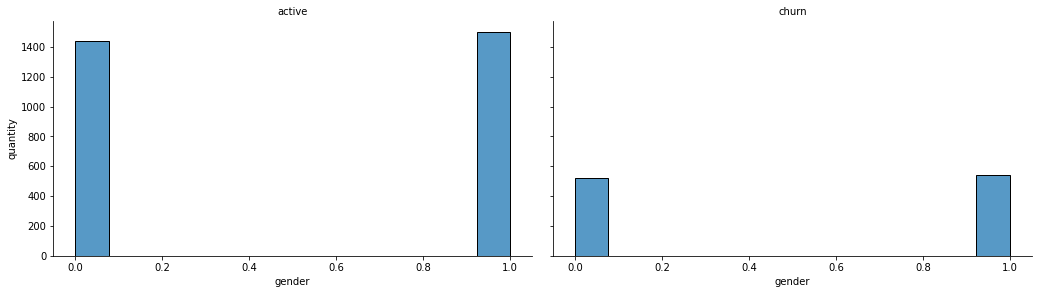

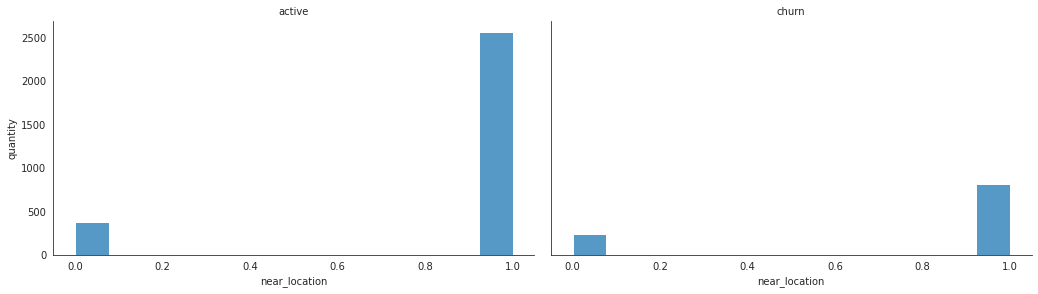

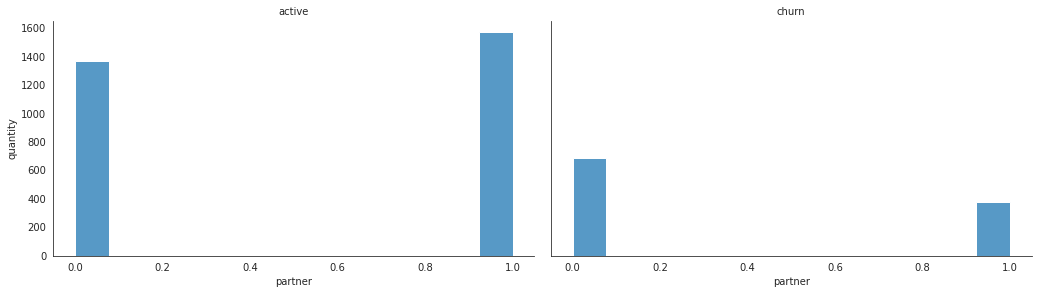

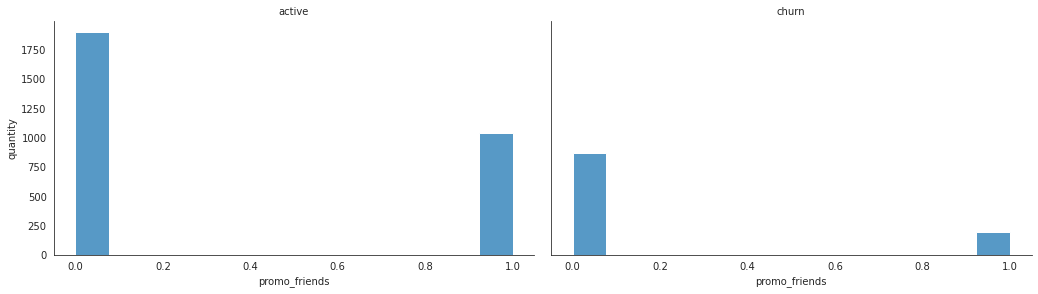

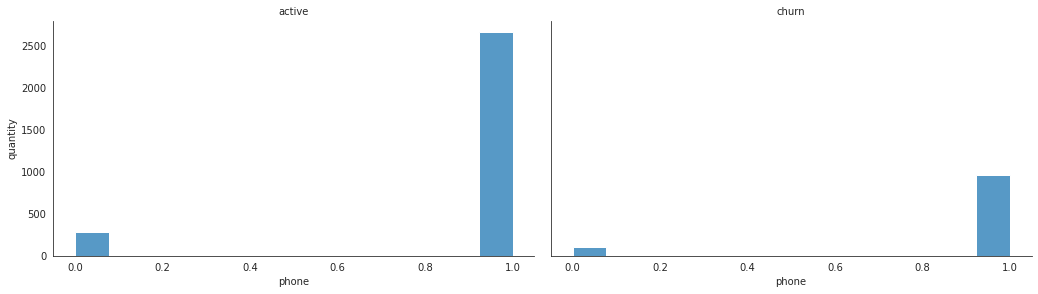

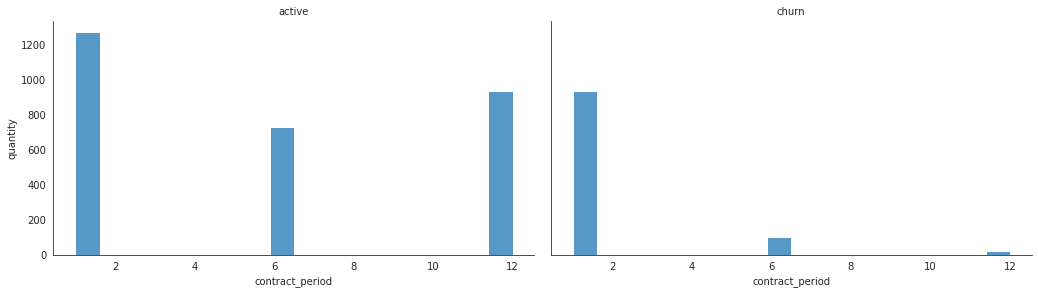

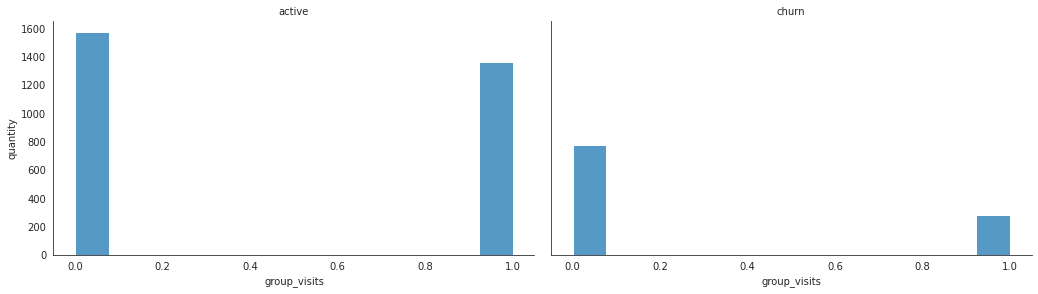

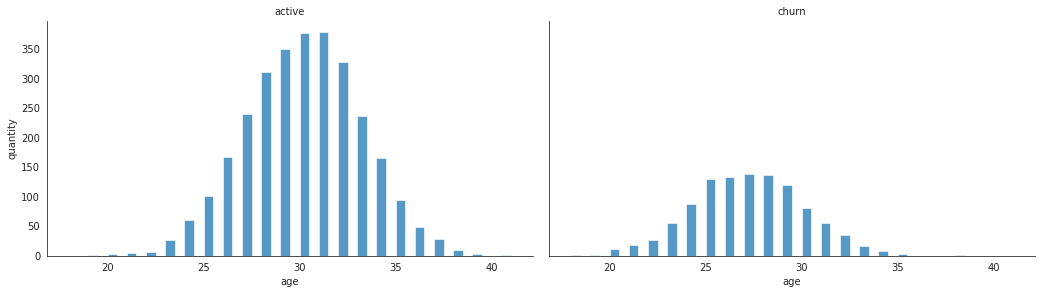

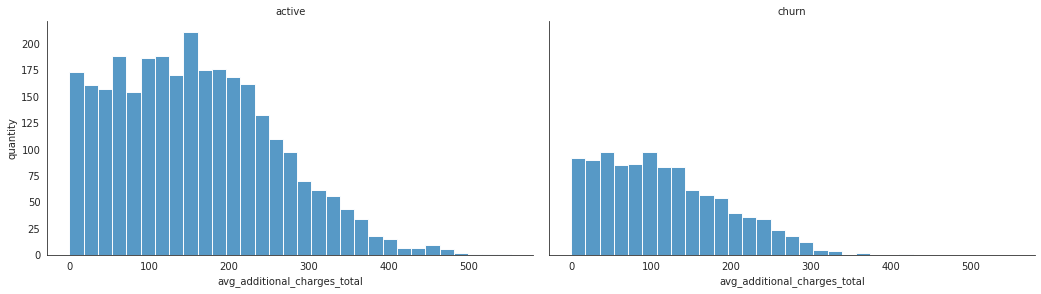

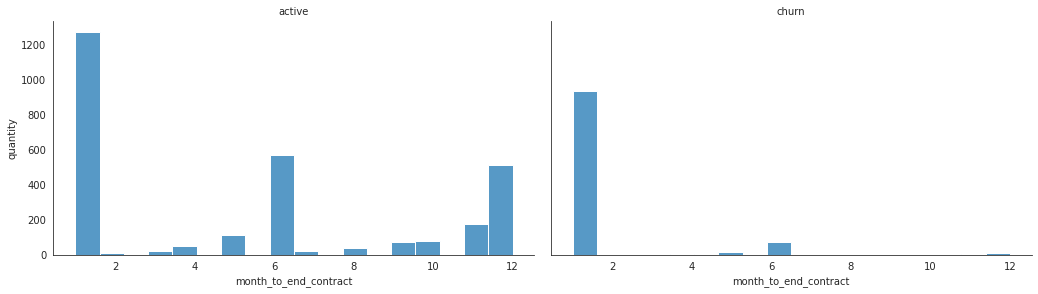

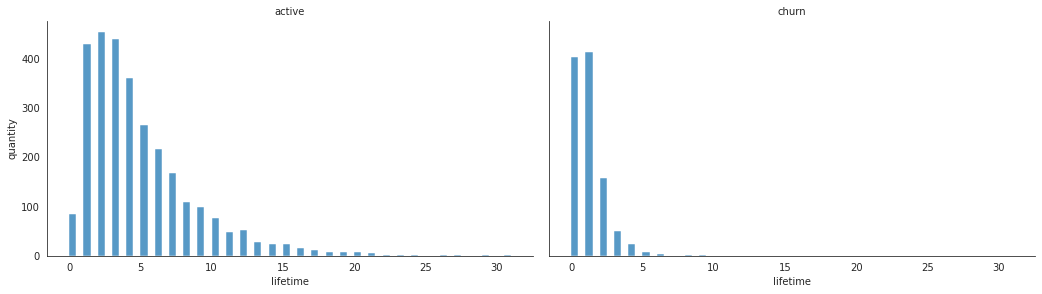

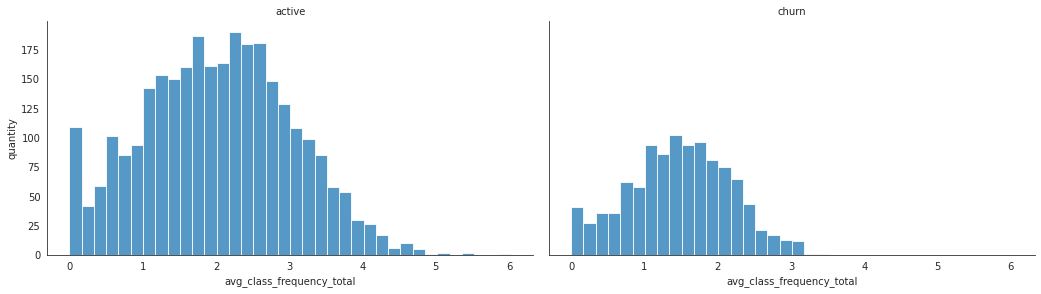

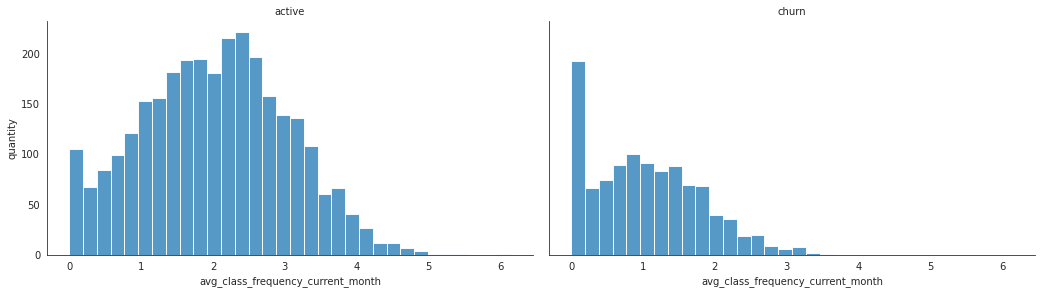

In [9]:
X=df.drop(columns='churn')
df_graph=df.copy()
df_graph['churn'] = df_graph['churn'].replace([1,0],['churn','active'])
for name in X.columns:
  graph=sns.displot(data=df_graph, x=name, col="churn", palette="rocket")
  sns.set_style(style='white')
  graph.fig.set_figwidth(15)
  graph.fig.set_figheight(4)
  graph.set_axis_labels(name, "quantity")
  graph.set_titles("{col_name}");
  plt.show()

#### Вывод
<br>отток у мужчин и женщин - одинаковый;
<br>расстояние не является основной причиной, видно что даже клиенты, находящиеся рядом с фитнес-центром тоже активно уходят;
<br>в основном приобретают абонемент на месяц;
<br>большинству клиентов не интересны групповые занятия;
<br>основное распределение трат в диапазоне от 0 до 150 у.е.
<br>у основной массы до конца абонемента остается 1 мес.;
<br>распределение продолжительности посещения в основном сосредоточено на отметке в 1-2 месяца, далее резкий спад.

### Построим матрицу корреляций и отобразим её

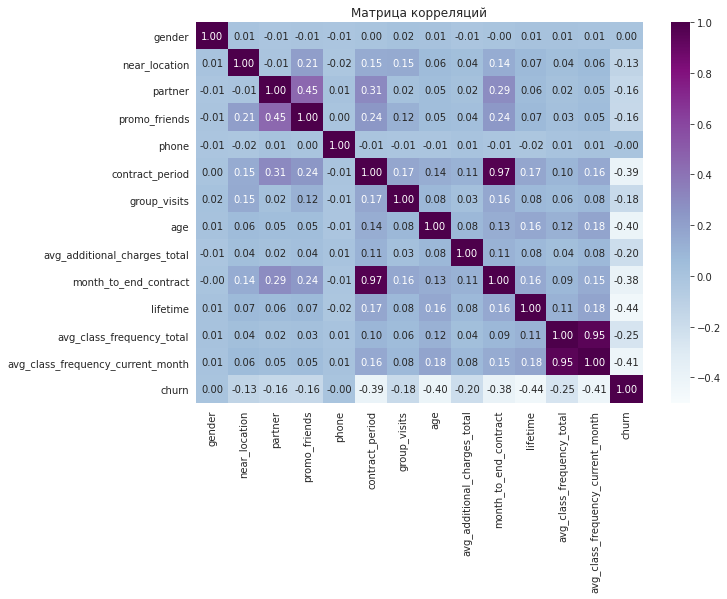

In [10]:
cm=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='.2f',vmin=-0.5,annot_kws={"size": 10}, cmap="BuPu")
plt.title('Матрица корреляций', fontsize = 12)
plt.show()

#### Вывод
<br>Между собой сильно коррелируют две пары признаков:
<br>-срок абонемента (contract_period) и количество месяцев до конца абонемента (month_to_end_contract)
<br>-средняя частота посещений за весь период (avg_class_frequency_total) и средняя частота посещений за последний месяц (avg_class_frequency_current_month)

## Шаг 3. Построим модель прогнозирования оттока клиентов

### Разобьем данные на обучающую и валидационную выборку функцией train_test_split()
У нас есть сильная корреляция между несколькими признаками, что говорит о мультиколлениарности. Лучше всего избавляться от одного из таких признаков, чтобы наша модель работала объективно.

In [11]:
df_del_corr = df.copy()
df_del_corr = df_del_corr.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

Разделим наши данные на признаки (матрица X) и целевую переменную (y) Применим для (y) атрибут stratify, что даст нам безопасность сохранения 20% значений равного нужного нам количества классов в целевой переменной.

In [12]:
X=df_del_corr.drop('churn', axis=1)
y=df_del_corr['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Стандартизируем данные

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train) 
X_test_st =  scaler.transform(X_test)

### Обучим модель на train-выборке двумя способами:

1) Логистической регрессией:

In [14]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state = 0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

2) Случайным лесом:

In [15]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

### Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Ответим на вопрос: какая модель показала себя лучше на основании метрик?
<br> Accuracy: доля правильных ответов
<br> Precision: точность (англ. precision)
<br> Recall: полнота
<br> F1_score: баланс между Precision and Recall
<br> ROC_AUC: доля оценки качества классификатора

In [16]:
def print_all_metrics(y_true, y_pred, y_proba, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [17]:
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities, 'Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.84
	F1: 0.84
	ROC_AUC: 0.97
Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.77
	F1: 0.81
	ROC_AUC: 0.96


#### Вывод
<br>-Доля правильных ответов (Accuracy) почти одинакова для обеих моделей: для случайного леса составляет 91%, для логистической регрессии 92%.
<br>-Точность (Precision) одинакова для обеих моделей и составляет 85%.
<br>-Полнота (Recall) для логистической регрессии составляет 84%, для случайного леса 77%.
<br>-F1-мера для логистической регрессии составляет 84%, для случайного леса 81%.
<br>-Таким образом, модель логической регрессии в нашем случае показала результат чуть лучше по сравнению с моделью случайного леса.

## Шаг 4. Сделаем кластеризацию клиентов

### Стандартизируйте данные

In [18]:
df_sc = scaler.fit_transform(df.drop(columns = ['churn'])) 

### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму

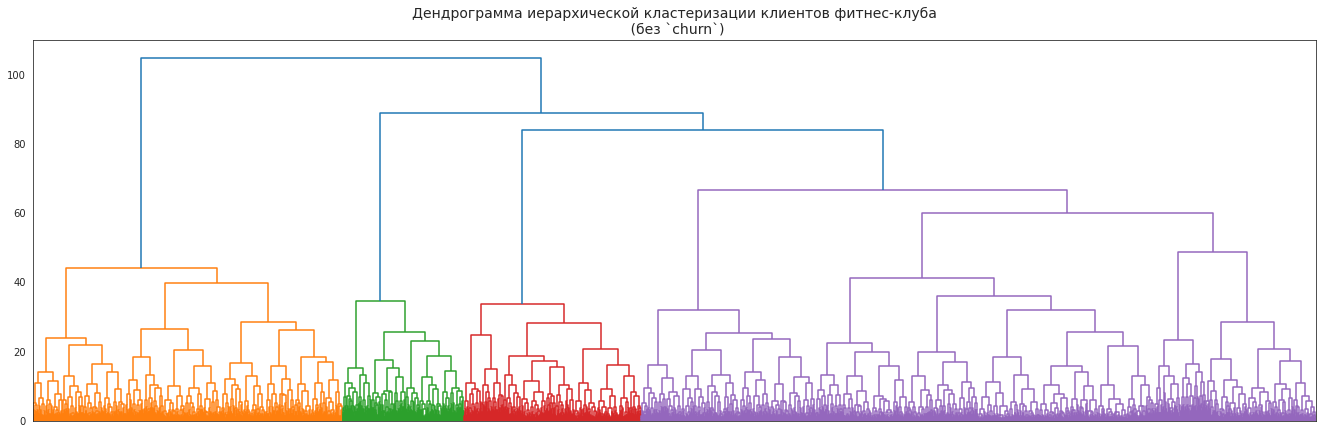

In [19]:
linked = linkage(df_sc, method = 'ward')
plt.figure(figsize=(23, 7))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Дендрограмма иерархической кластеризации клиентов фитнес-клуба\n (без `churn`)', size=14)
plt.show() 

"Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике.
Четвертый столбец очень большой попробуем добавить столбец churn и посмотрим на результат"

In [27]:
#df_sc = scaler.fit_transform(df) 
#linked = linkage(df_sc, method = 'ward')
#plt.figure(figsize=(23, 7))  
#dendrogram(linked, orientation='top', no_labels=True)
#plt.title('Дендрограмма иерархической кластеризации клиентов фитнеса\n (с `churn`)', size=14)
#plt.show()

"Число кластеров с дополнительным столбцом увеличилось до 5, что судя по дендрограмме более корректно."

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [28]:
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(df_sc)

In [31]:
#Сохраним метки кластера в поле cluster_km нашего датасета
df['cluster_km'] = labels

In [32]:
#Оценим метрикой силуэта качество кластеризации
df_sc = scaler.fit_transform(df)
silhouette_score(df_sc, labels)

0.18765244211636894

#### Вывод
Качество кластеризации не высокое.

### Посмотрим на средние значения признаков для кластеров

In [33]:
#Произведем группировку данных по кластеру
df.groupby('cluster_km').mean().T

cluster_km,0,1,2,3
gender,0.513382,0.507105,0.513658,0.502722
near_location,1.000000,0.944938,0.996003,0.000000
partner,0.328467,0.749556,0.383744,0.466425
promo_friends,0.216545,0.522202,0.283811,0.076225
phone,0.901460,0.904973,0.898734,0.916515
contract_period,1.610706,11.008881,2.556296,2.119782
group_visits,0.288321,0.536412,0.460360,0.212341
age,26.925791,29.869449,30.139241,28.551724
avg_additional_charges_total,113.405204,164.202480,157.516044,132.907913
month_to_end_contract,1.562044,10.047957,2.391739,2.001815


#### Вывод
<br> Самый склонный к оттоку кластер (№0 - 96% оттока) объединил в себе клиентов, живущих поблизости к фитнес-центру. Так же у данного кластера самые низкие средние значения практически по всем остальным признакам:
<br>длительности абонемента
<br>возраста
<br>дополнительные траты
<br>количества месяцев до конца абонемента
<br>срока жизни (времени с момента первого обращения)
<br>частоты посещения за всё время и за последний месяц

<br>Второй по склонности к оттоку кластер (№3 - 44%) состоит из клиентов, живущих в отдалении от клуба - этим он кардинально отличается от предыдущего (самого рискованного) кластера №0. В остальном так же имеет низкие показатели. 

<br>Самый надёжный кластер (№2 - 0,2% оттока) имеет сравнительно высокие средние значения по всем призникам.

<br>Второй по надёжности кластер (№1 - низкий отток) местами выделяется показатели чуть лучше, чем у кластера № 2.

### Построим распределения признаков для кластеров

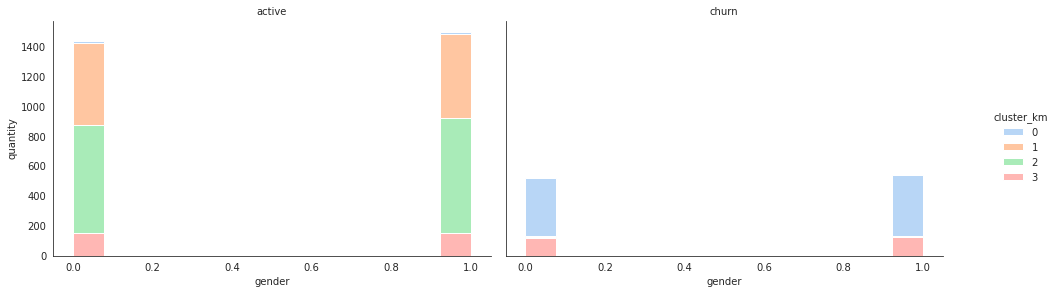

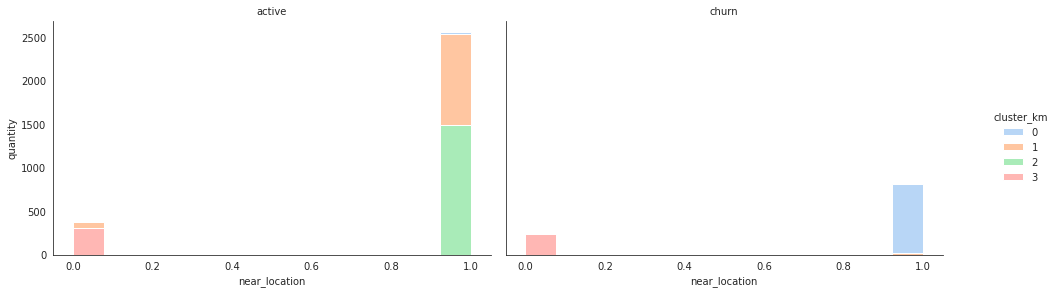

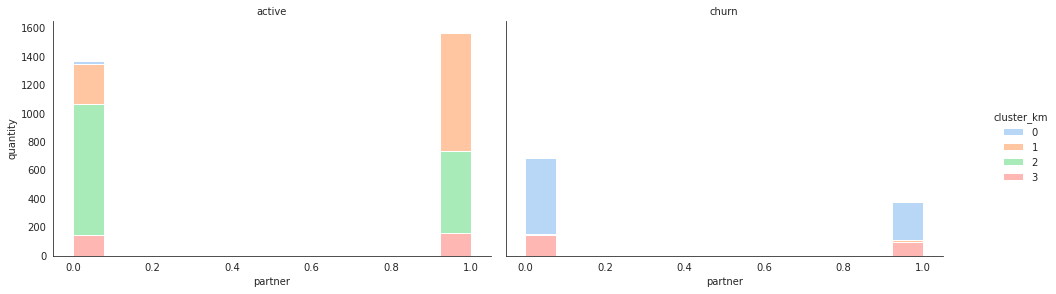

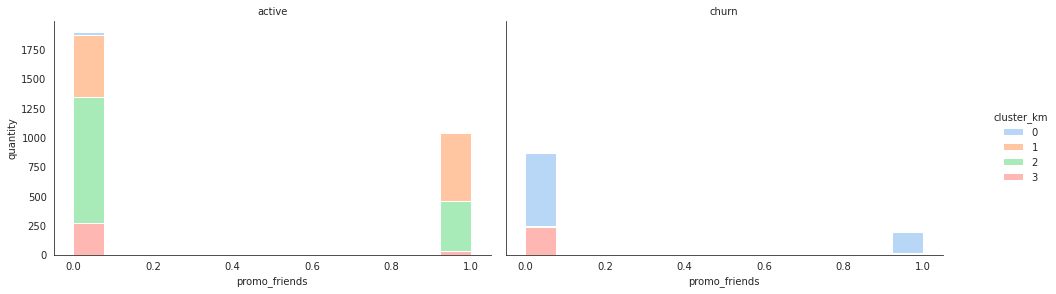

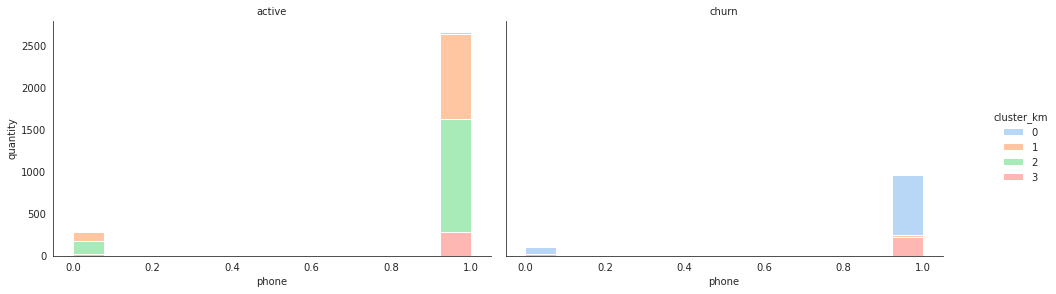

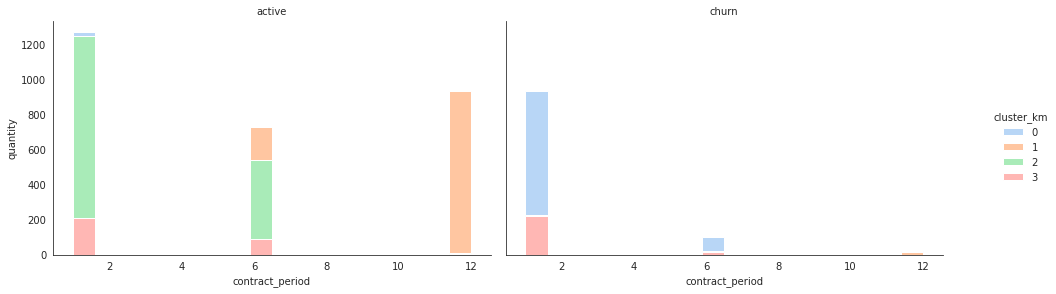

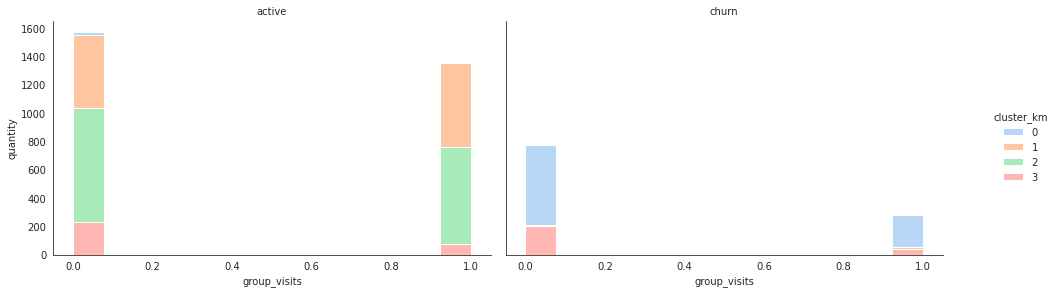

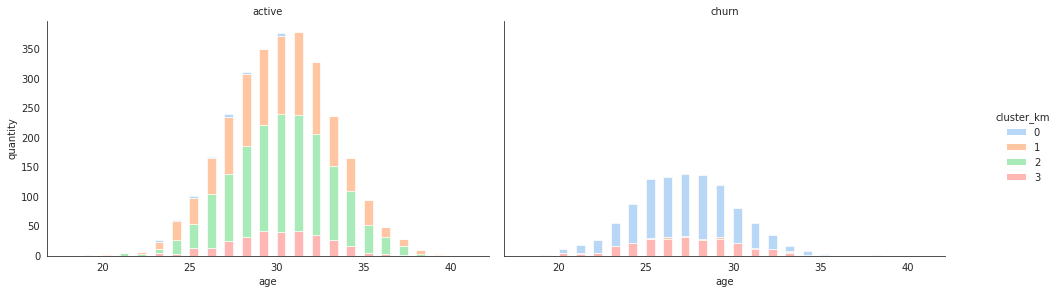

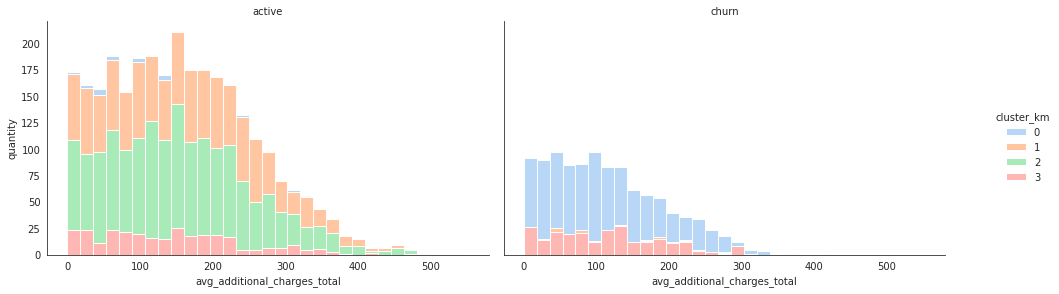

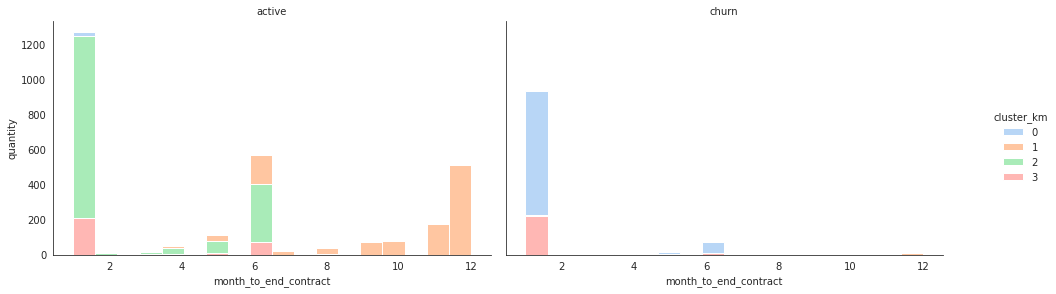

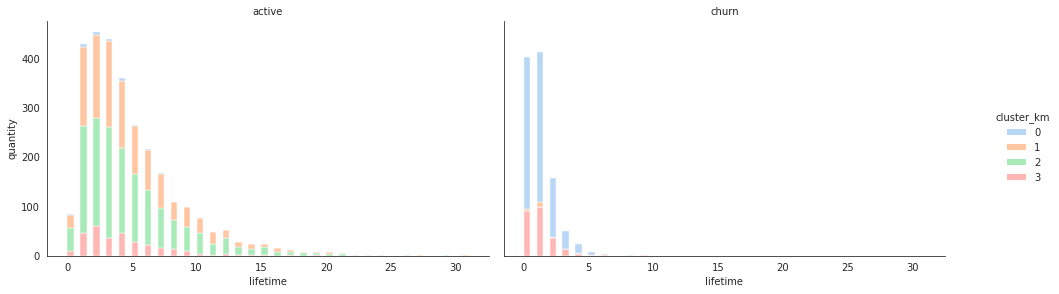

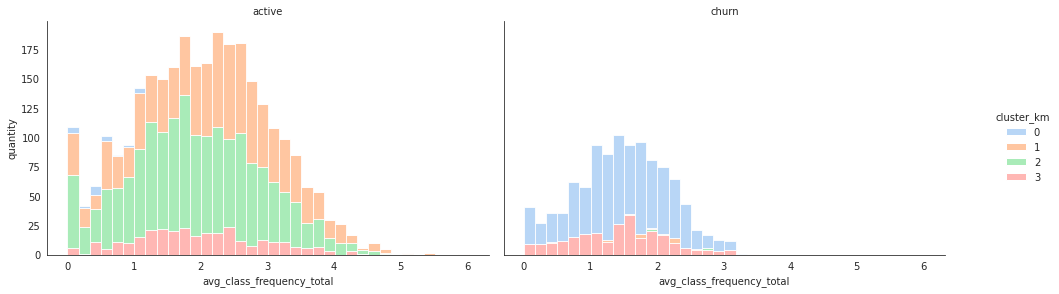

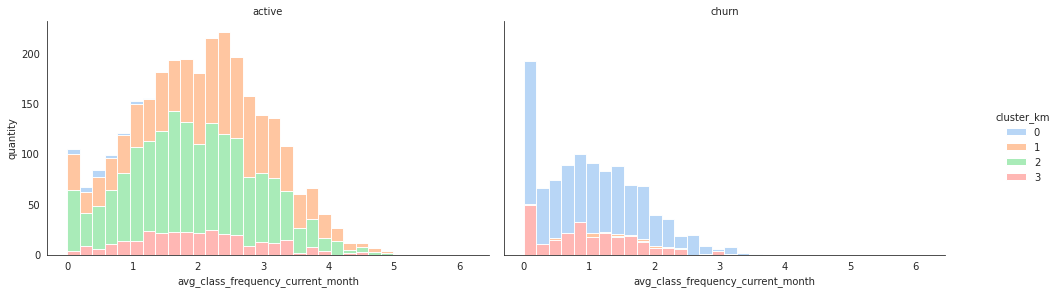

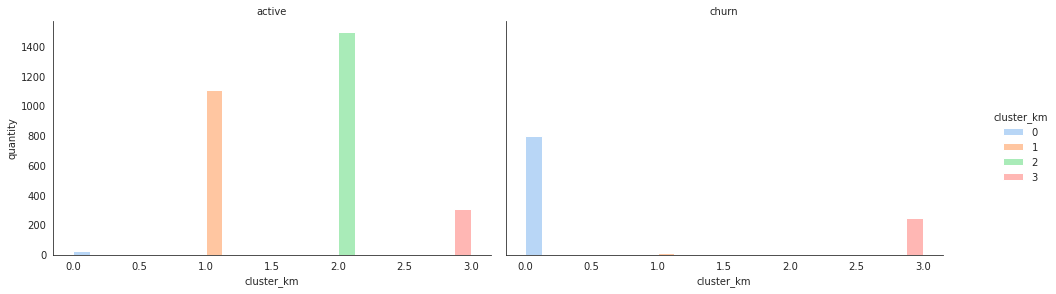

In [34]:
X=df.drop(columns='churn')
df_graph=df.copy()
df_graph['churn'] = df_graph['churn'].replace([1,0],['churn','active'])
for name in X.columns:
  graph = sns.displot(df_graph, x=name, hue="cluster_km", palette="pastel", multiple="stack", col="churn")
  graph.fig.set_figwidth(15)
  graph.fig.set_figheight(4)
  graph.set_axis_labels(name, "quantity")
  graph.set_titles("{col_name}");
  plt.show()

#### Вывод

<br> -большая часть всех клиентов живут или работают рядом с фитнес-центром;
<br> -половина клиентов не являются сотрудниками компании-партнера;
<br> -у большей части клиентов в анкете указан номер телефона;
<br> -в основном все клиенты заключают контракт на минимальный срок;
<br> -большая часть клиентов не посещают групповые занятия;
<br> -гистограмма возраста имеет распределение нормального вида, со смещением влево;
<br> -гистограмма дополнительных трат имеет отрицательное биномиальное распределение и в 2 раза ниже показателей по действующим клиентам;
<br> -"срок жизни" клиентов до 5 месяцев, но в большинстве случаев они ходят в клуб 1-2 месяца;
<br> -посещения 1-2 раза в неделю;


### Посчитаем долю оттока по кластерам

In [35]:
df.groupby('cluster_km').agg({'churn':'mean'})

,churn
cluster_km,
0,0.968370
1,0.014210
2,0.002665
3,0.444646


#### Вывод
Как уже было отмечено ранее, кластер № 0 состоит из клиентов в оттоке, а клиенты из кластеров № 2 и 1 являются наиболее лояльными.

## Шаг 5. Вывод


В ходе исселодвательской работе был проведен анализ данных, построены две модели прогнозирования оттока клиентов и произведена кластеризация клиентов для определения поведенческих групп клиентов и отличительных признаков клиентов из оттока.


На основе данных мы обучили две модели по алгоритмам логистической регрессии и случайного леса. Модель логистической регрессии выдала наилучшие метрики, в дальнейшем для прогнозирования оттока клиентов можно применять именно ее.

- Если клиент стал реже ходить на групповые тренировки, то есть большой шанс на отток клиента.
- Если клиент живет далеко, и ему требуется время на дорогу, то вероятность оттока выше, на удержание таких клиентов следует направить больше усилий.
- Если клиент пришел сам по себе, не по акции "Приведи друга", то есть шанс, что он уйдет. Таких клиентов следует заинтересовать групповыми занятиями, так как коллективный спорт и новые знакомства стимулируют клиентов чаще и дольше ходить в фитнес-клубы, так как происходит завязывание и укрепление новых социальных связей, нетворкинг по схожим интересам.
- Те, кто в клуб пришел недавно, могут остаться незаинтересованными и в скором времени покинуть его, поэтому на "свежих" клиентов нужно направить больше усилий по удержанию, так как атмосфера клуба, обстановка и персонал для них новы, нужно в первое время окружить их доп. вниманием и заботой, чтобы клиент почувствовал себя комфортно и привык к новому месту (но все же в первую очередь от мотивации человека и его заинтересованности в этом).

Рекомендации:

- Активное ведение страниц клуба в соцсетях и продвижение. Создать атмосферу, розыгрыши призов, чтобы клиенты ощущали чувство принадлежности к сообществу клуба.
- Улучшение и поддержание интерьера клуба и работоспособности тренажеров, чтобы клиентам было так же комфортно заниматься в нем, как раньше.
- Проведение коллективных активностей в клубе (бесплатные тренировки по субботам, различные мероприятия после занятий или по вечерам; организация специальных фитнес-мероприятий).
- Индивидуальный подход к клиентам (заинтересованность их успехами, предложение советов и помощи, чтобы их поддержать, к примеру раз в неделю можно брать услугу тренера совершенно бесплатно).
    </div>